In [3]:
import gym
import matplotlib
import numpy as np
import pandas as pd
from gym import spaces
from gym.utils import seeding

matplotlib.use("Agg")
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv
from IPython.display import clear_output

%matplotlib inline

In [4]:
data = pd.read_csv('../Downloads/demo_LTC-USD_20190926.csv/demo_LTC-USD_20190926.csv')

In [5]:
data

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2019-09-26 20:36:38.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.000650,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
1,2019-09-26 20:36:39.067000+00:00,53.825,0.01,0.0,5.500119,-0.000093,-0.000650,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
2,2019-09-26 20:36:40.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.000650,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
3,2019-09-26 20:36:41.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.000650,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
4,2019-09-26 20:36:42.067000+00:00,53.825,0.01,0.0,0.000000,-0.000093,-0.000650,-0.001022,-0.001393,-0.001579,...,0.0,0,0.0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91397,2019-09-27 21:59:55.067000+00:00,56.475,0.03,0.0,0.000000,-0.000266,-0.000620,-0.000797,-0.000974,-0.001151,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91398,2019-09-27 21:59:56.067000+00:00,56.475,0.03,0.0,0.000000,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91399,2019-09-27 21:59:57.067000+00:00,56.475,0.03,0.0,0.000000,-0.000266,-0.000620,-0.000797,-0.000974,-0.001328,...,0.0,0,0.0,0,0,0.0,0,0,0,0
91400,2019-09-27 21:59:58.067000+00:00,56.475,0.03,0.0,0.000000,-0.000266,-0.000620,-0.000797,-0.000974,-0.001505,...,0.0,0,0.0,0,0,0.0,0,0,0,0


In [6]:
columns_to_delete = []
for i in range(15):
    columns_to_delete.append(f'bids_cancel_notional_{i}')
    columns_to_delete.append(f'bids_limit_notional_{i}')
    columns_to_delete.append(f'bids_market_notional_{i}')
    columns_to_delete.append(f'asks_cancel_notional_{i}')
    columns_to_delete.append(f'asks_limit_notional_{i}')
    columns_to_delete.append(f'asks_market_notional_{i}')
data.drop(columns_to_delete, axis=1, inplace=True)
X_train, X_test = data[:int(len(data) * 0.8)], data[int(len(data) * 0.8):]
X_train

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_notional_5,asks_notional_6,asks_notional_7,asks_notional_8,asks_notional_9,asks_notional_10,asks_notional_11,asks_notional_12,asks_notional_13,asks_notional_14
0,2019-09-26 20:36:38.067000+00:00,53.825,0.01,0.000000,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,8140.589844,2928.939941,7702.459961,2577.870117,5397.000000,6379.700195,1002.599976,1955.569946,749.190002,3540.949951
1,2019-09-26 20:36:39.067000+00:00,53.825,0.01,0.000000,5.500119,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,5391.000000,5393.000000,7702.459961,3000.560059,1002.599976,3540.949951,3000.550049,10.830000,9561.669922,3000.550049
2,2019-09-26 20:36:40.067000+00:00,53.825,0.01,0.000000,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,7765.850098,5393.000000,2042.959961,5661.600098,3000.560059,3673.699951,2178.040039,3540.949951,2384.570068,3000.550049
3,2019-09-26 20:36:41.067000+00:00,53.825,0.01,0.000000,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,7765.850098,5393.000000,2042.959961,3000.560059,3673.699951,2178.040039,3540.949951,2384.570068,3000.550049,2734.100098
4,2019-09-26 20:36:42.067000+00:00,53.825,0.01,0.000000,0.000000,-0.000093,-0.00065,-0.001022,-0.001393,-0.001579,...,5391.000000,5393.000000,2042.959961,5661.600098,3000.560059,1002.599976,3540.949951,3000.550049,10.830000,9561.669922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73116,2019-09-27 16:55:14.067000+00:00,54.570,0.04,956.845771,0.000000,-0.000367,-0.00055,-0.000916,-0.001100,-0.001283,...,6052.319824,4252.790039,2345.070068,3002.739990,498.980011,3056.419922,2092.479980,22994.490234,3245.739990,19434.009766
73117,2019-09-27 16:55:15.067000+00:00,54.570,0.04,0.000000,0.000000,-0.000367,-0.00055,-0.000916,-0.001100,-0.001283,...,6052.319824,4252.790039,2345.070068,3002.739990,498.980011,3056.419922,2092.479980,22994.490234,3245.739990,19434.009766
73118,2019-09-27 16:55:16.067000+00:00,54.570,0.04,0.000000,0.000000,-0.000367,-0.00055,-0.000916,-0.001100,-0.001283,...,6052.319824,4252.790039,2345.070068,3002.739990,498.980011,3056.419922,2092.479980,22994.490234,3245.739990,19434.009766
73119,2019-09-27 16:55:17.067000+00:00,54.570,0.04,0.000000,0.000000,-0.000367,-0.00055,-0.000916,-0.001100,-0.001283,...,6052.319824,4252.790039,2345.070068,3002.739990,498.980011,3056.419922,2092.479980,22994.490234,3245.739990,19434.009766


In [7]:
# dynamic_as_model.py
# Description:
# This module provides a class implementing a dynamic Avellaneda-Stoikov (AS)
# like market making model. It calculates volatility, adjusts gamma dynamically
# based on volatility, and then computes bid/ask quote adjustments and target prices.
# This is designed to be adaptable for various trading strategy implementations.

import numpy as np
import pandas as pd # Used for pd.Timestamp, pd.isna
from collections import deque
import math
import time # For rate-limited warnings (optional, can be removed)

class DynamicASQuotingModel:
    def __init__(self,
                 # AS Model Core Parameters
                 base_gamma: float = 0.1,           # Base inventory risk aversion
                 target_spread_bps: float = 20.0,   # Target bid-ask spread in basis points
                 min_level_bps: int = 5,            # Minimum bps spread from reference price

                 # Volatility Calculation Parameters
                 rolling_window_size: int = 100,    # For calculating rolling volatility
                 volatility_ewma_alpha: float = 0.05, # Smoothing factor for EWMA of volatility

                 # Dynamic Gamma Adjustment Parameters
                 gamma_adjustment_factor: float = 0.5, # How strongly gamma reacts to vol changes
                 gamma_min: float = 0.01,              # Minimum allowed gamma
                 gamma_max: float = 5.0                # Maximum allowed gamma
                ):
        """
        Initializes the DynamicASQuotingModel.

        Args:
            base_gamma (float): The baseline inventory risk aversion parameter.
            target_spread_bps (float): The desired bid-ask spread around the reservation price, in BPS.
            min_level_bps (int): The minimum BPS spread from the reference mid-price, ensuring orders
                                 are not too close even if AS model suggests it.
            rolling_window_size (int): The number of recent prices to use for volatility calculation.
            volatility_ewma_alpha (float): The alpha for EWMA calculation of volatility.
            gamma_adjustment_factor (float): Factor determining how much gamma changes based on
                                             the ratio of current volatility to its EWMA.
            gamma_min (float): Minimum cap for gamma.
            gamma_max (float): Maximum cap for gamma.
        """
        if not (0 < volatility_ewma_alpha <= 1):
            raise ValueError("volatility_ewma_alpha must be between 0 and 1.")
        if not (gamma_min <= base_gamma <= gamma_max):
            print(f"Warning: base_gamma ({base_gamma}) is outside [gamma_min ({gamma_min}), gamma_max ({gamma_max})]. Clamping to bounds.")
            base_gamma = max(gamma_min, min(base_gamma, gamma_max))
        if rolling_window_size < 2:
            raise ValueError("rolling_window_size must be at least 2.")

        self.base_gamma = base_gamma
        self.current_gamma = base_gamma # Initialized to base_gamma
        self.target_spread_bps = target_spread_bps
        self.min_level_bps = max(0, min_level_bps) # Ensure non-negative

        self.rolling_window_size = int(rolling_window_size) # Ensure it's an integer
        self.price_buffer = deque(maxlen=self.rolling_window_size)
        self.volatility = 0.0  # Instantaneous/rolling volatility
        self.volatility_ewma = 0.0  # Smoothed EWMA of volatility
        self.volatility_ewma_initialized = False
        self.volatility_ewma_alpha = volatility_ewma_alpha

        self.gamma_adjustment_factor = gamma_adjustment_factor
        self.gamma_min = gamma_min
        self.gamma_max = gamma_max

        # For rate-limited warnings (optional utility)
        self._warning_times = {}
        self._warning_interval_seconds = 60


    def _rate_limited_warning(self, message_key, message):
        """Prints a warning message, rate-limited by message_key."""
        current_time = time.time()
        last_time = self._warning_times.get(message_key, 0)
        if current_time - last_time > self._warning_interval_seconds:
            print(f"AS_Model Warning ({message_key}): {message}")
            self._warning_times[message_key] = current_time

    def update_price_buffer(self, current_market_price: float):
        """Adds the latest market price to the buffer for volatility calculation."""
        if pd.notna(current_market_price) and current_market_price > 0:
            self.price_buffer.append(current_market_price)

    def _calculate_volatility(self):
        """
        Calculates annualized rolling volatility from the price buffer.
        Updates self.volatility and self.volatility_ewma.
        Assumes prices in buffer are from 250ms intervals.
        """
        if len(self.price_buffer) < self.rolling_window_size:
            # Not enough data points yet for a full rolling window
            # Could set volatility to a default, np.nan, or 0. For now, 0.
            self.volatility = 0.0
            # Do not update EWMA until buffer is full or a minimum number of points are present
            return

        prices = np.array(list(self.price_buffer))
        # Ensure prices are valid (positive, not NaN)
        prices = prices[~np.isnan(prices) & (prices > 0)]

        if len(prices) < 2: # Need at least two prices to calculate returns
            self.volatility = 0.0
            return

        log_returns = np.log(prices[1:] / prices[:-1])

        if len(log_returns) < 1: # Not enough returns
            self.volatility = 0.0
            return

        std_dev_log_returns = np.std(log_returns)

        # Annualization factor:
        # Assuming 250ms ticks (4 ticks per second)
        ticks_per_second = 4
        seconds_per_year = 365.25 * 24 * 60 * 60
        ticks_per_year = ticks_per_second * seconds_per_year

        annualized_vol = std_dev_log_returns * np.sqrt(ticks_per_year)

        self.volatility = annualized_vol if not (np.isnan(annualized_vol) or np.isinf(annualized_vol)) else 0.0

        # Update EWMA of volatility
        if self.volatility > 0 or self.volatility_ewma_initialized: # Start EWMA once we have a valid volatility
            if not self.volatility_ewma_initialized:
                self.volatility_ewma = self.volatility
                if self.volatility > 1e-9: # Only mark initialized if EWMA is meaningfully set
                    self.volatility_ewma_initialized = True
            else:
                self.volatility_ewma = (self.volatility_ewma_alpha * self.volatility +
                                       (1 - self.volatility_ewma_alpha) * self.volatility_ewma)
        # If volatility is 0 and EWMA was never initialized but buffer is full, init EWMA to 0
        elif not self.volatility_ewma_initialized and self.volatility == 0 and len(self.price_buffer) == self.rolling_window_size:
            self.volatility_ewma = 0.0
            self.volatility_ewma_initialized = True


    def _update_dynamic_gamma(self, gamma):
        """
        Adjusts self.current_gamma based on the ratio of current volatility
        to its EWMA, capped by gamma_min and gamma_max.
        """

        # Final cap on current_gamma
        self.current_gamma = gamma

    def _get_time_remaining_normalized(self, current_pd_timestamp: pd.Timestamp, period_duration_seconds: float = 3600.0) -> float:
        """
        Calculates normalized time remaining in a period (e.g., to next funding).
        Args:
            current_pd_timestamp: pandas Timestamp of the current moment.
            period_duration_seconds: Duration of the period in seconds (default 1 hour).
        Returns:
            Fraction of time remaining in the period (0.0 to 1.0).
        """
        if pd.isna(current_pd_timestamp):
            return 0.5 # Default to mid-period if timestamp is invalid

        try:
            # Example: if period is 1 hour, time to next full hour
            seconds_into_period = (current_pd_timestamp.minute * 60 +
                                   current_pd_timestamp.second +
                                   current_pd_timestamp.microsecond / 1e6) % period_duration_seconds

            seconds_remaining_in_period = period_duration_seconds - seconds_into_period

            # Normalize, ensuring it's slightly above 0 to avoid division by zero in AS formula
            return max(1e-6, seconds_remaining_in_period / period_duration_seconds)
        except AttributeError: # If not a pandas Timestamp
            self._rate_limited_warning("time_norm_ts_error", "Invalid timestamp object for time normalization.")
            return 0.5 # Default

    def _bps_to_usdc(self, price: float, bps_value: float) -> float:
        """Converts basis points to a USD delta relative to a given price."""
        if pd.isna(price) or price <= 0 or pd.isna(bps_value):
            return 0.0
        return price * bps_value / 10000.0

    def _calculate_as_quote_prices(self,
                                   reference_mid_price: float,
                                   inventory_q: float,
                                   current_gamma_val: float,
                                   sigma_ewma_val: float,
                                   time_normalized_val: float):
        """
        Calculates the Avellaneda-Stoikov bid and ask prices.

        Args:
            reference_mid_price (float): The current fair mid-price of the asset.
            inventory_q (float): Current inventory of the asset (positive for long, negative for short).
            current_gamma_val (float): Current inventory risk aversion parameter.
            sigma_ewma_val (float): EWMA of annualized volatility.
            time_normalized_val (float): Normalized time remaining in the trading horizon (0 to 1).


        Returns:
            tuple: (as_model_bid_price, as_model_ask_price)
        """
        # Default prices if inputs are invalid
        default_bid_adj_usd = self._bps_to_usdc(reference_mid_price, self.target_spread_bps / 2.0)
        default_ask_adj_usd = self._bps_to_usdc(reference_mid_price, self.target_spread_bps / 2.0)

        # Handle cases where reference_mid_price might be NaN or non-positive
        if pd.isna(reference_mid_price) or reference_mid_price <= 0:
            return np.nan, np.nan # Cannot calculate without a valid reference

        default_bid = reference_mid_price - default_bid_adj_usd
        default_ask = reference_mid_price + default_ask_adj_usd

        if pd.isna(sigma_ewma_val) or sigma_ewma_val < 0 or \
           pd.isna(time_normalized_val) or time_normalized_val <= 0 or \
           pd.isna(current_gamma_val) or current_gamma_val < 0 or \
           pd.isna(inventory_q):
            # If critical AS parameters are invalid, fall back to a simple spread around mid
            # but still apply min_level_bps from reference_mid_price
            min_spread_usd = self._bps_to_usdc(reference_mid_price, self.min_level_bps)
            final_bid = reference_mid_price - min_spread_usd
            final_ask = reference_mid_price + min_spread_usd
            return final_bid, final_ask

        # 1. Calculate Reservation Price (Rp)
        inventory_skew_usd = 0.0
        try:
            # sigma_ewma_val is annualized volatility. AS model uses variance * time.
            # If time_normalized_val is fraction of an hour, sigma_ewma_val^2 * time_normalized_val is variance for that fraction of hour.
            # If time_normalized_val is fraction of a day, adjust sigma_ewma_val accordingly or ensure T is consistent.
            # Assuming time_normalized_val is fraction of the period for which sigma_ewma_val is relevant (e.g. if sigma is daily vol, T is fraction of day)
            # For simplicity, let's assume sigma_ewma_val is scaled appropriately for the period T=time_normalized_val represents.
            # If sigma_ewma_val is annualized, and time_normalized_val is fraction of an hour:
            # T_annual = time_normalized_val / (24*365.25) # if period_duration_seconds was 1 hour
            # For now, assume time_normalized_val is T in the formula sigma^2 * T

            variance_times_time = (sigma_ewma_val ** 2) * time_normalized_val
            inventory_skew_usd = inventory_q * current_gamma_val * variance_times_time
        except OverflowError:
            inventory_skew_usd = np.sign(inventory_q * current_gamma_val) * np.inf

        # Cap skew to a reasonable percentage of the mid-price to prevent extreme reservation prices
        max_skew_abs_usd = reference_mid_price * 0.10 # e.g., 10% of mid-price
        if abs(inventory_skew_usd) > max_skew_abs_usd:
            inventory_skew_usd = np.sign(inventory_skew_usd) * max_skew_abs_usd
        if pd.isna(inventory_skew_usd) or np.isinf(inventory_skew_usd):
            inventory_skew_usd = 0.0

        reservation_price = reference_mid_price - inventory_skew_usd
        if pd.isna(reservation_price):
            return default_bid, default_ask

        # 2. Calculate Spread around Reservation Price
        # The spread (delta) is typically based on liquidity and volatility.
        # Here, we use target_spread_bps applied to the original reference_mid_price.
        half_spread_usd_from_target = self._bps_to_usdc(reference_mid_price, self.target_spread_bps / 2.0)

        as_bid_price_pre_min = reservation_price - half_spread_usd_from_target
        as_ask_price_pre_min = reservation_price + half_spread_usd_from_target


        # 3. Ensure minimum spread from the original reference_mid_price using min_level_bps
        min_spread_usd_from_ref = self._bps_to_usdc(reference_mid_price, self.min_level_bps)

        final_as_bid_price = min(as_bid_price_pre_min, reference_mid_price - min_spread_usd_from_ref)
        final_as_ask_price = max(as_ask_price_pre_min, reference_mid_price + min_spread_usd_from_ref)

        # Ensure bid < ask
        if final_as_bid_price >= final_as_ask_price:
            # If crossed, center around reservation_price with min_level_bps spread from reference
            # or simply use the default spread if reservation price itself is problematic
            if pd.notna(reservation_price):
                final_as_bid_price = min(reservation_price - 1e-5, reference_mid_price - min_spread_usd_from_ref) # Ensure slightly below Rp
                final_as_ask_price = max(reservation_price + 1e-5, reference_mid_price + min_spread_usd_from_ref) # Ensure slightly above Rp
                if final_as_bid_price >= final_as_ask_price: # If still crossed, use defaults
                     final_as_bid_price = default_bid
                     final_as_ask_price = default_ask
            else: # Fallback if reservation price was NaN
                final_as_bid_price = default_bid
                final_as_ask_price = default_ask

        return final_as_bid_price, final_as_ask_price


    def get_as_quotes(self,
                      current_market_price: float,
                      current_inventory_q: float,
                      current_pd_timestamp: pd.Timestamp,
                      gamma,
                      hourly_period_duration_seconds: float = 3600.0):
        """
        Main public method to get AS-derived bid and ask quotes.

        Args:
            current_market_price (float): The current reference market mid-price.
            current_inventory_q (float): The current inventory of the base asset.
            current_pd_timestamp (pd.Timestamp): The current timestamp.
            hourly_period_duration_seconds (float): Duration of the trading/funding period in seconds
                                                 for time normalization (default 1 hour).

        Returns:
            tuple: (as_bid_quote_price, as_ask_quote_price)
                   Returns (np.nan, np.nan) if valid quotes cannot be generated.
        """
        if pd.isna(current_market_price) or current_market_price <= 0:
            self._rate_limited_warning("get_quotes_invalid_market_price", f"Invalid current_market_price: {current_market_price}")
            return np.nan, np.nan

        # 1. Update price buffer and calculate current volatility
        self.update_price_buffer(current_market_price)
        self._calculate_volatility() # Updates self.volatility and self.volatility_ewma

        # 2. Update dynamic gamma
        self._update_dynamic_gamma(gamma) # Updates self.current_gamma

        # 3. Get normalized time remaining
        #    The interpretation of 'T' in AS model (time_norm) is crucial.
        #    If volatility (sigma) is annualized, T should be fraction of a year.
        #    If using hourly funding, T might be fraction of hour to next funding.
        #    Here, _get_time_remaining_normalized defaults to fraction of an hour.
        #    Ensure consistency with how sigma is scaled or interpreted.
        #    For this example, we'll use the hourly fraction.
        time_norm = self._get_time_remaining_normalized(current_pd_timestamp, period_duration_seconds=hourly_period_duration_seconds)


        # 4. Calculate AS model's desired bid and ask prices
        #    The AS model uses self.volatility_ewma (sigma) as it's more stable.
        as_bid_price, as_ask_price = self._calculate_as_quote_prices(
            reference_mid_price=current_market_price, # Using current market price as reference
            inventory_q=current_inventory_q,
            current_gamma_val=self.current_gamma,
            sigma_ewma_val=self.volatility_ewma,
            time_normalized_val=time_norm
        )

        # Round to typical price tick size (e.g., 0.1 for USD quotes)
        # This step depends on the specific market's tick size.
        # Assuming a tick size of 0.1 for this example.
        if pd.notna(as_bid_price):
            as_bid_price = round(as_bid_price / 0.1) * 0.1
        if pd.notna(as_ask_price):
            as_ask_price = round(as_ask_price / 0.1) * 0.1

        # Final sanity check: bid < ask
        if pd.notna(as_bid_price) and pd.notna(as_ask_price) and as_bid_price >= as_ask_price:
            # If crossed after rounding, adjust slightly or invalidate
            # This might happen if spread is very small and rounding pushes them together/across
            # For simplicity, could invalidate or set a minimum fixed spread in USD (e.g. 0.1)
            # self._rate_limited_warning("get_quotes_crossed", f"AS quotes crossed after rounding: Bid {as_bid_price}, Ask {as_ask_price}. Invalidating.")
            # return np.nan, np.nan
            # Or, enforce a minimal spread around their mean if they are too close/crossed
            mid = (as_bid_price + as_ask_price) / 2
            min_tick_spread = 0.1
            as_bid_price = mid - min_tick_spread / 2
            as_ask_price = mid + min_tick_spread / 2
            as_bid_price = round(as_bid_price / 0.1) * 0.1 # Re-round
            as_ask_price = round(as_ask_price / 0.1) * 0.1


        return as_bid_price, as_ask_price

In [30]:
class MarketMakingEnv(gym.Env):
    def __init__(self, df, window_size=10, initial_balance=10000, inventory_limit=1000, deal_limit=1000, **params):
        super().__init__()
        self.data = df.drop(columns=['system_time']).to_numpy()
        self.time_data = df['system_time'].values
        self.columns = [col for col in df.columns if col != 'system_time']
        self.window_size = window_size
        self.current_step = 0
        self.initial_balance = initial_balance
        self.inventory_limit = inventory_limit
        self.deal_limit = deal_limit
        self.taker_fee = 0.0004
        self.maker_fee = 0.0002
        self.calculate_inventory_graph_freq = self.window_size

        self._precompute_column_indices()

        self.obs_dim = len(self._get_state_columns())

        self.action_space = spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.obs_dim * window_size,),
            dtype=np.float32
        )
        self.AS = DynamicASQuotingModel()

        self.reset_trader_state()
        self.graph_info = {'inv_part': [], 'gamma': [], 'PnL': [], 'base_token': [], 'quote_token': [], 'sells': [], 'buys': []}

    def _precompute_column_indices(self):
        """Precompute column indices for faster access"""
        self.midpoint_idx = self.columns.index('midpoint')
        self.spread_idx = self.columns.index('spread')
        self.buys_idx = self.columns.index('buys')
        self.sells_idx = self.columns.index('sells')

        self.bids_distance_indices = [self.columns.index(f'bids_distance_{i}') for i in range(15)]
        self.asks_distance_indices = [self.columns.index(f'asks_distance_{i}') for i in range(15)]
        self.bids_notional_indices = [self.columns.index(f'bids_notional_{i}') for i in range(15)]
        self.asks_notional_indices = [self.columns.index(f'asks_notional_{i}') for i in range(15)]

    def reset_trader_state(self):
        self.base_token = 0
        self.quote_token = 0
        self.balance_base = self.initial_balance / 2 / self.data[self.current_step + self.window_size + 1][self.midpoint_idx]
        self.balance_quote = self.initial_balance / 2
        self.pnl = 0
        self.executed_orders_sell = []
        self.executed_orders_buy = []
        self.price_buffer = deque(maxlen=self.window_size)
        self.time_buffer = deque(maxlen=self.window_size)
        self.data_buffer = deque(maxlen=self.window_size)

    def _get_state_columns(self):
        return ['midpoint', 'spread', 'buys', 'sells'] + \
               [f'bids_distance_{i}' for i in range(15)] + \
               [f'asks_distance_{i}' for i in range(15)] + \
               [f'bids_notional_{i}' for i in range(15)] + \
               [f'asks_notional_{i}' for i in range(15)]

    def make_plots(self):
        fig, axes = plt.subplots(3, 2, figsize=(16, 15))
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        ax1, ax2, ax3, ax4, ax5 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0]

        ax1.plot(self.graph_info['inv_part'], label='Inventory Participation', color='blue')
        ax1.set_title('Inventory Participation Over Time')
        ax1.set_xlabel('Step')
        ax1.set_ylabel('Value')
        ax1.legend()
        ax1.grid(True)

        if self.graph_info['gamma']:
            ax2.plot(self.graph_info['gamma'], label='Gamma', color='green')
            ax2.set_title('Gamma Over Time')
            ax2.set_xlabel('Step')
            ax2.set_ylabel('Value')
            ax2.legend()
            ax2.grid(True)

        if self.graph_info['PnL']:
            ax3.plot(self.graph_info['PnL'], label='PnL', color='red')
            ax3.set_title('PnL Over Time')
            ax3.set_xlabel('Step')
            ax3.set_ylabel('Value')
            ax3.legend()
            ax3.grid(True)

        if 'base_token' in self.graph_info and 'quote_token' in self.graph_info:
            color = 'tab:blue'
            ax4.set_xlabel('Step')
            ax4.set_ylabel(f'LTC', color=color)
            ax4.plot(self.graph_info['base_token'], label=self.base_token, color=color)
            ax4.tick_params(axis='y', labelcolor=color)
            ax4.legend(loc='upper left')

            ax4b = ax4.twinx()
            color = 'tab:red'
            ax4b.set_ylabel(f'USDC', color=color)
            ax4b.plot(self.graph_info['quote_token'], label=self.quote_token, color=color)
            ax4b.tick_params(axis='y', labelcolor=color)
            ax4b.legend(loc='upper right')

            ax4.set_title(f'LTC and USDC Over Time')
            ax4.grid(True)

        if 'sells' in self.graph_info and 'buys' in self.graph_info:
            ax5.plot(self.graph_info['sells'], label='Sell Orders', color='red')
            ax5.plot(self.graph_info['buys'], label='Buy Orders', color='green')
            ax5.set_title('Executed Orders Count Over Time')
            ax5.set_xlabel('Step')
            ax5.set_ylabel('Number of Orders')
            ax5.legend()
            ax5.grid(True)


    def reset(self):
        self.current_step = 0
        self.reset_trader_state()
        return self._get_observation()

    def step(self, action):
        print(self.current_step, self.balance_quote, self.balance_base, self.pnl)
        if self.current_step >= len(self.data) - self.window_size:
            obs = self._get_observation()
            return obs, 0.0, True, {}

        gamma = (np.tanh(action[0]) + 1) / 2
        if self.current_step % 100 == 0:
            self.graph_info['gamma'].append(gamma)
            inv_part = self._calculate_inventory_graph(self.current_step)
            self.graph_info['inv_part'].append(inv_part)
            self.graph_info['base_token'].append(self.base_token)
            self.graph_info['quote_token'].append(self.quote_token)
            self.graph_info['sells'].append(len(self.executed_orders_sell))
            self.graph_info['buys'].append(len(self.executed_orders_buy))

        as_bid_quote_price, as_ask_quote_price = self._calculate_prices(gamma)

        self._simulate_execution(as_bid_quote_price, as_ask_quote_price)

        self.current_step += 1

        reward = self._calculate_reward()

        done = self.current_step >= len(self.data) - self.window_size
        '''if self.current_step % 100 == 0:
            self.make_plots()'''

        info = {
            'gamma': gamma,
            'best_bid': as_bid_quote_price,
            'best_ask': as_ask_quote_price,
            'inventory': self.quote_token,
            'balance': self.balance_quote,
            'pnl': self.pnl,
            'executed_orders_sell': self.executed_orders_sell
        }

        return self._get_observation(), reward, done, info

    def _calculate_prices(self, gamma):
        as_bid_quote_price, as_ask_quote_price = self.AS.get_as_quotes(
            self.price_buffer[-1],
            self.base_token,
            self.time_buffer[-1],
            gamma
        )
        return as_bid_quote_price, as_ask_quote_price

    def _simulate_execution(self, as_bid_quote_price, as_ask_quote_price):
        current_row = self.data[self.current_step + self.window_size + 1]
        buys = current_row[self.buys_idx]
        sells = current_row[self.sells_idx]

        i = 0
        flag = True
        while i < 15 and sells > 0 and flag:
            price_level = current_row[self.midpoint_idx] + current_row[self.bids_distance_indices[i]]
            notional = current_row[self.bids_notional_indices[i]]
            if price_level < as_bid_quote_price and sells > 0:
                amount_cur_level = min(self.deal_limit / as_bid_quote_price, self.balance_base)
                #print(amount_cur_level, as_bid_quote_price, amount_cur_level * as_bid_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
                executed = min(amount_cur_level, max(sells / as_bid_quote_price, 0))
                self.balance_base += executed
                self.balance_quote -= executed * as_bid_quote_price
                self.base_token += executed
                self.quote_token -= executed * as_bid_quote_price
                self.executed_orders_sell.append(('sell', executed, as_bid_quote_price))
                sells -= executed * as_bid_quote_price
                flag = False
            elif price_level == as_bid_quote_price and sells > 0:
                sells -= notional
                amount_cur_level = min(self.deal_limit / as_bid_quote_price, self.balance_base)
                #print(amount_cur_level, as_bid_quote_price, amount_cur_level * as_bid_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
                executed = min(amount_cur_level, max(sells / as_bid_quote_price, 0))
                self.balance_base += executed
                self.balance_quote -= executed * as_bid_quote_price
                self.base_token += executed
                self.quote_token -= executed * as_bid_quote_price
                self.executed_orders_sell.append(('sell', executed, as_bid_quote_price))
                sells -= executed * as_bid_quote_price
                flag = False
            elif sells > 0:
                sells -= notional
            i += 1

        flag = True
        i = 0
        while i < 15 and buys > 0 and flag:
            price_level = current_row[self.midpoint_idx] + current_row[self.asks_distance_indices[i]]
            notional = current_row[self.asks_notional_indices[i]]

            if price_level > as_ask_quote_price and buys > 0:
                amount_cur_level = min(self.deal_limit / as_ask_quote_price, self.balance_quote / as_ask_quote_price)
                #print(amount_cur_level, as_ask_quote_price, amount_cur_level * as_ask_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
                executed = min(amount_cur_level, max(buys / as_ask_quote_price, 0))
                self.balance_base -= executed
                self.balance_quote += executed * as_ask_quote_price
                self.base_token -= executed
                self.quote_token += executed * as_ask_quote_price
                self.executed_orders_buy.append(('buy', executed, as_ask_quote_price))
                buys -= executed * as_ask_quote_price
                flag = False
            elif price_level == as_ask_quote_price and buys > 0:
                buys -= notional
                amount_cur_level = min(self.deal_limit / as_ask_quote_price, self.balance_quote / as_ask_quote_price)
                #print(amount_cur_level, as_ask_quote_price, amount_cur_level * as_ask_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
                executed = min(amount_cur_level, max(buys / as_ask_quote_price, 0))
                self.balance_base -= executed
                self.balance_quote += executed * as_ask_quote_price
                self.base_token -= executed
                self.quote_token += executed * as_ask_quote_price
                self.executed_orders_buy.append(('buy', executed, as_ask_quote_price))
                buys -= executed * as_ask_quote_price
                flag = False
            elif buys > 0:
                buys -= notional
            i += 1

        self.pnl = self.balance_quote + self.balance_base * current_row[self.midpoint_idx] - self.initial_balance
        if self.current_step % self.window_size == 0:
            self.graph_info['PnL'].append(self.pnl)

    def _calculate_inventory_graph(self, freq):
        if self.current_step % self.calculate_inventory_graph_freq == 0 or self.current_step % freq == 0:
            current_row = self.data[self.current_step + self.window_size + 1]
            full_balance = self.balance_base * current_row[self.midpoint_idx] + self.balance_quote
            base_b = self.balance_base * current_row[self.midpoint_idx]
            q_part = self.balance_quote / full_balance
            b_part = base_b / full_balance
            #print(full_balance, q_part, b_part, self.base_token, self.quote_token, 888)
            return (q_part - b_part) / 2
        return 0


    def _calculate_reward(self):
        inventory_penalty = self._calculate_inventory_graph(self.current_step)
        pnl_reward = 0.01 * self.pnl
        #print(inventory_penalty, pnl_reward, 999)
        return pnl_reward - abs(inventory_penalty)

    def _get_observation(self):
        if self.current_step == 0 or self.current_step + self.window_size >= len(self.data):
            if self.current_step + self.window_size >= len(self.data):
                self.reset()

            state_indices = [self.columns.index(col) for col in self._get_state_columns()]

            window_slice = self.data[self.current_step:self.current_step + self.window_size, state_indices]
            time_slice = self.time_data[self.current_step:self.current_step + self.window_size]

            self.data_buffer.clear()
            self.price_buffer.clear()
            self.time_buffer.clear()

            for i in range(window_slice.shape[0]):
                self.data_buffer.append(window_slice[i])
                self.price_buffer.append(window_slice[i, 0])
                self.time_buffer.append(pd.Timestamp(time_slice[i]))
        else:
            state_indices = [self.columns.index(col) for col in self._get_state_columns()]

            new_row = self.data[self.current_step + self.window_size, state_indices]
            new_time = self.time_data[self.current_step + self.window_size]

            self.data_buffer.append(new_row)
            self.price_buffer.append(new_row[0])
            self.time_buffer.append(pd.Timestamp(new_time))

        observation_data = np.array(self.data_buffer).flatten().astype(np.float32)
        return observation_data

    def get_sb_env(self):
        return DummyVecEnv([lambda: self]), self.reset()

In [31]:
env = MarketMakingEnv(X_train, window_size=100)
vec_env, obs = env.get_sb_env()

from stable_baselines3 import PPO
model = PPO("MlpPolicy", vec_env, verbose=0)
model.learn(total_timesteps=2048)
# print(self.current_step, self.balance_quote, self.balance_base, self.pnl)
# print(amount_cur_level, as_ask_quote_price, amount_cur_level * as_ask_quote_price,  price_level, notional, self.balance_base, self.balance_quote, i)
# print(full_inv, base_token_part, quote_token_part, self.base_token, self.quote_token, 888)
# print(inventory_penalty, pnl_reward, 999)

C:\Users\evskl\PyCharmMiscProject\.venv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


0 5000.0 92.97136481963555 0
1 5000.0 92.97136481963555 0.0
2 5000.0 92.97136481963555 0.0
3 5000.0 92.97136481963555 0.0
4 5000.0 92.97136481963555 0.0
5 6000.0 74.38400422484001 3.719027402014035
6 6000.0 74.38400422484001 4.4628674442610645
7 6000.0 74.38400422484001 4.4628674442610645
8 6000.0 74.38400422484001 5.206707486509913
9 6000.0 74.38400422484001 6.69438757100761
10 6000.0 74.38400422484001 6.69438757100761
11 6000.0 74.38400422484001 6.69438757100761
12 6000.0 74.38400422484001 6.69438757100761
13 6000.0 74.38400422484001 6.69438757100761
14 6000.0 74.38400422484001 6.69438757100761
15 6000.0 74.38400422484001 6.69438757100761
16 6000.0 74.38400422484001 6.69438757100761
17 6000.0 74.38400422484001 6.69438757100761
18 6000.0 74.38400422484001 6.322467549882276
19 6000.0 74.38400422484001 6.322467549882276
20 6000.0 74.38400422484001 6.322467549882276
21 6000.0 74.38400422484001 6.322467549882276
22 6000.0 74.38400422484001 6.322467549882276
23 6000.0 74.38400422484001 6.3

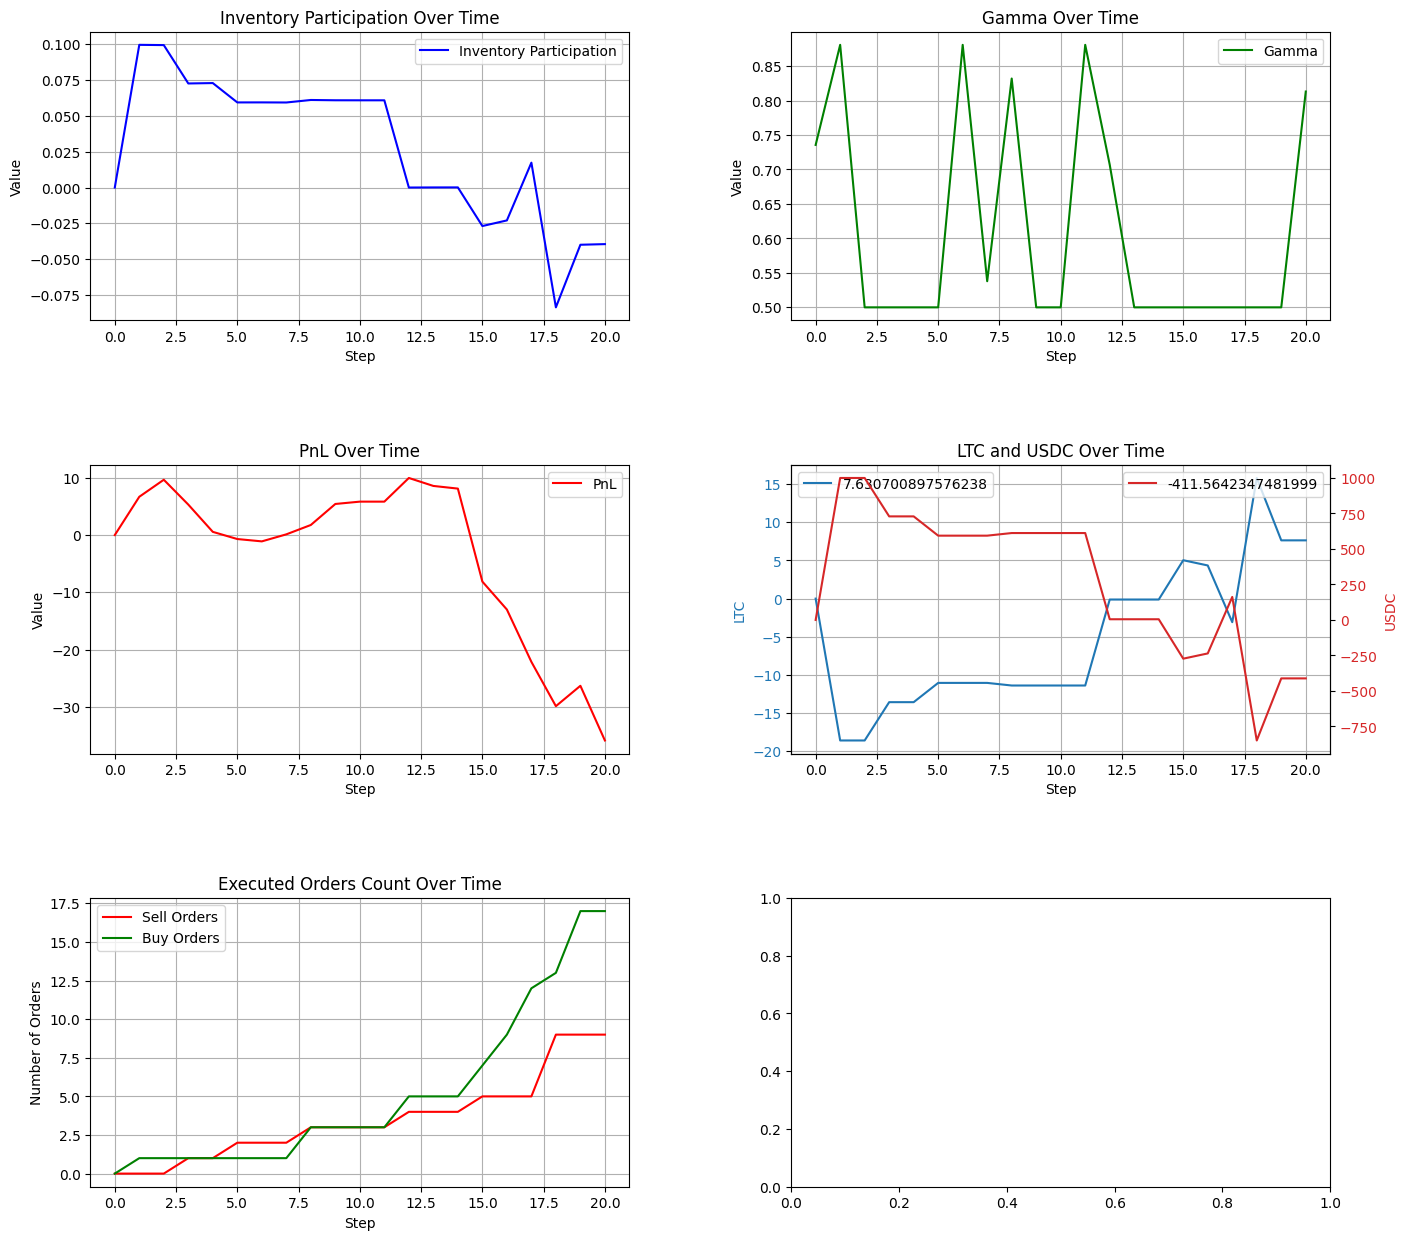

In [32]:
env.make_plots()

KeyboardInterrupt: 

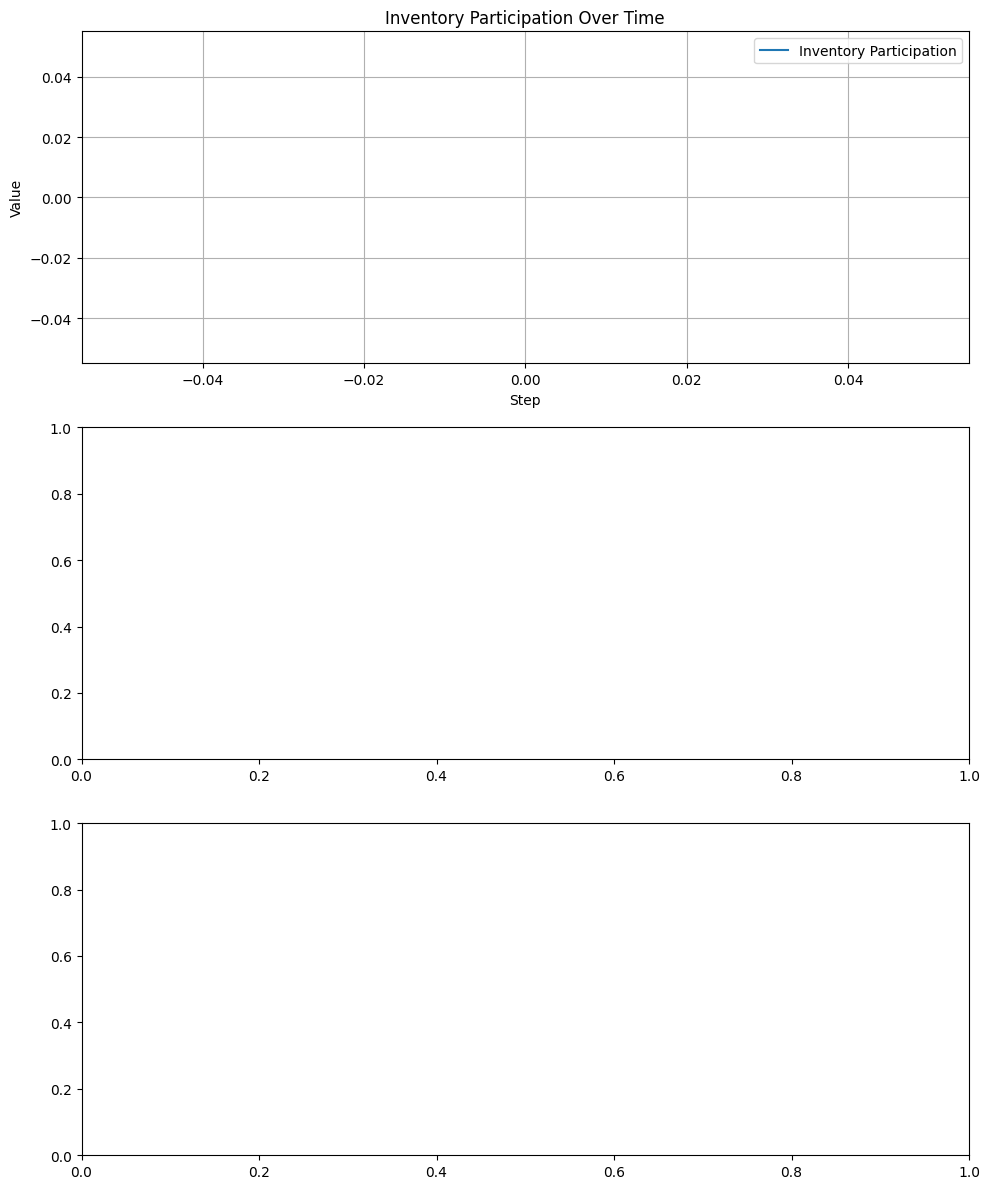

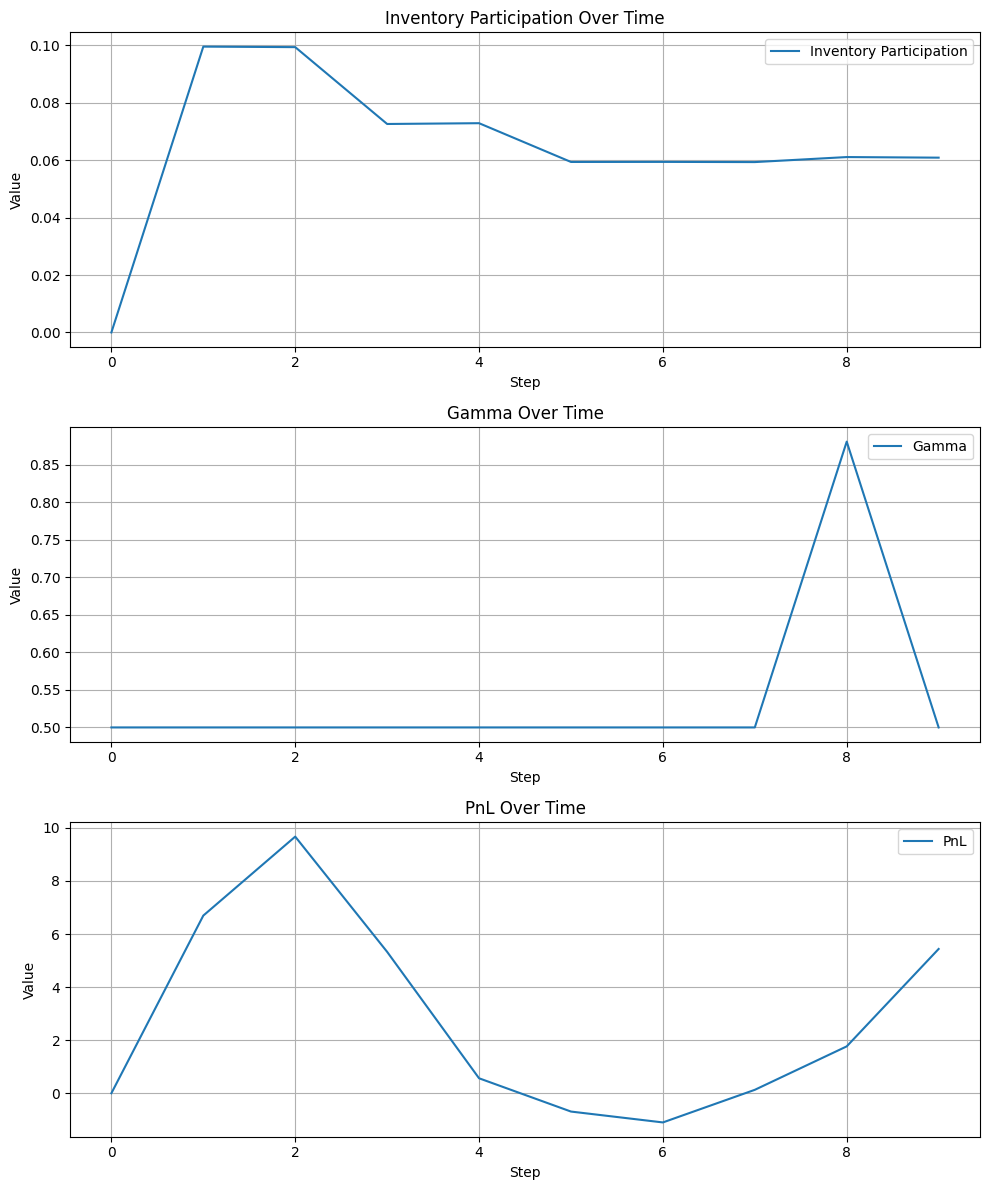

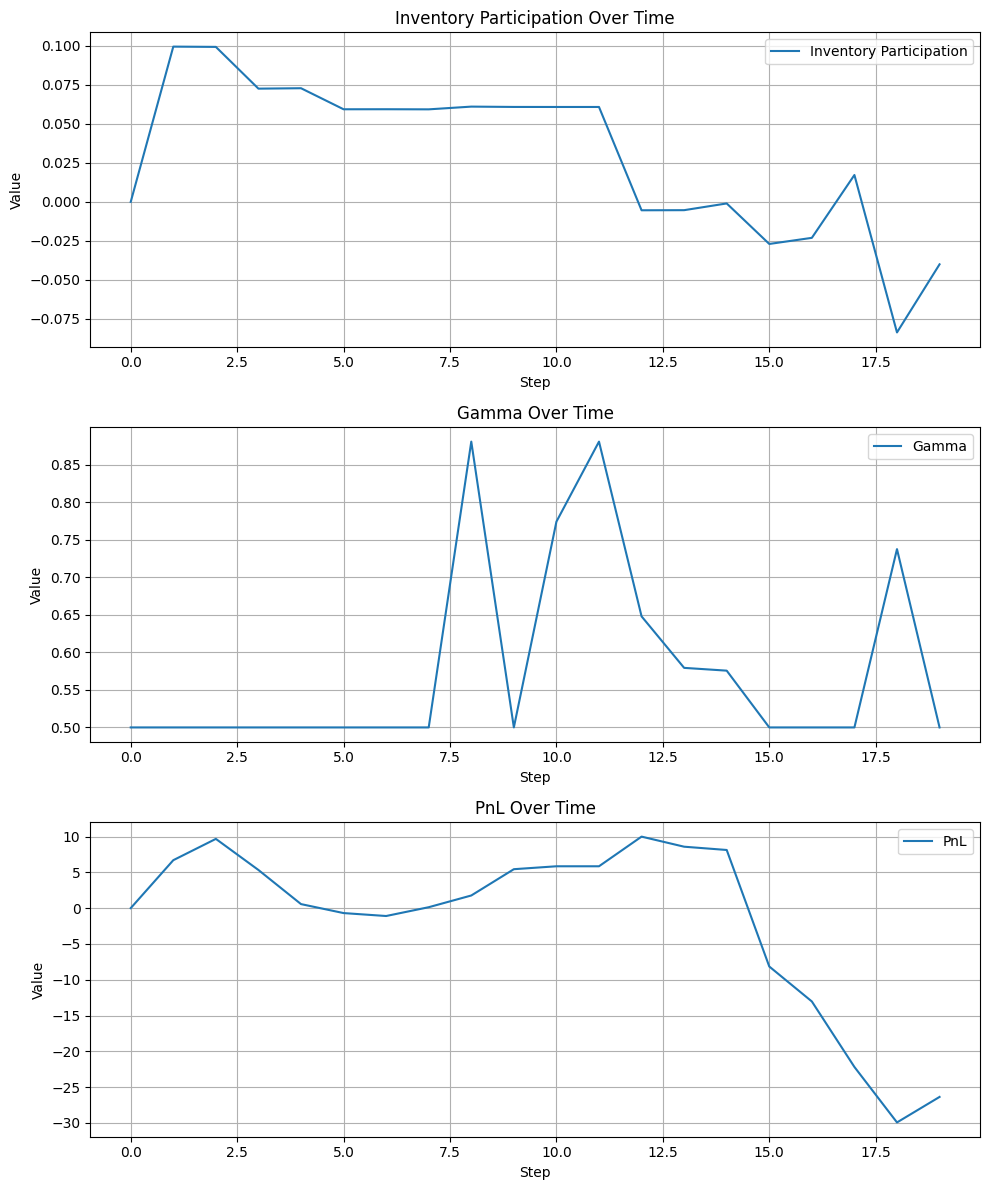

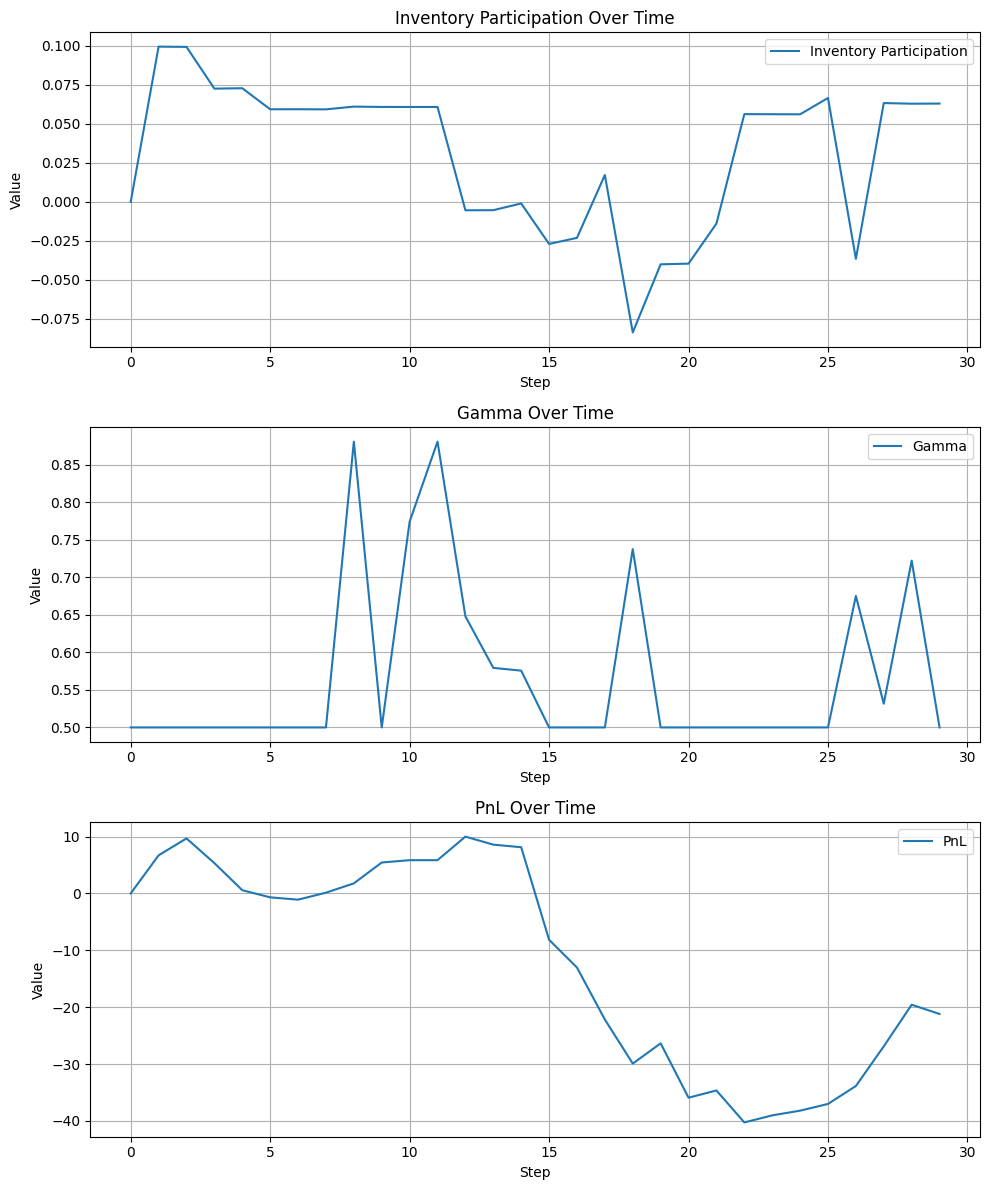

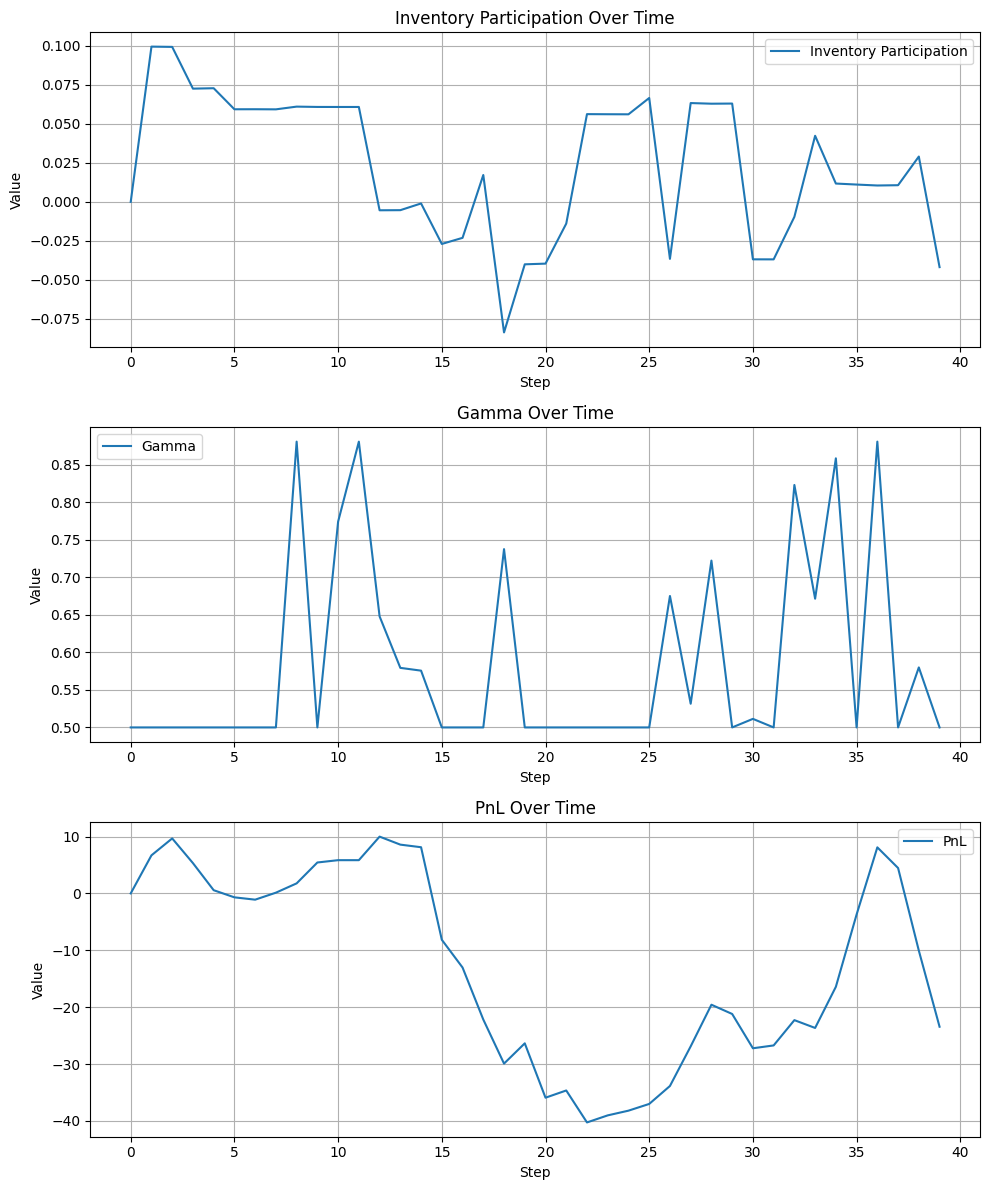

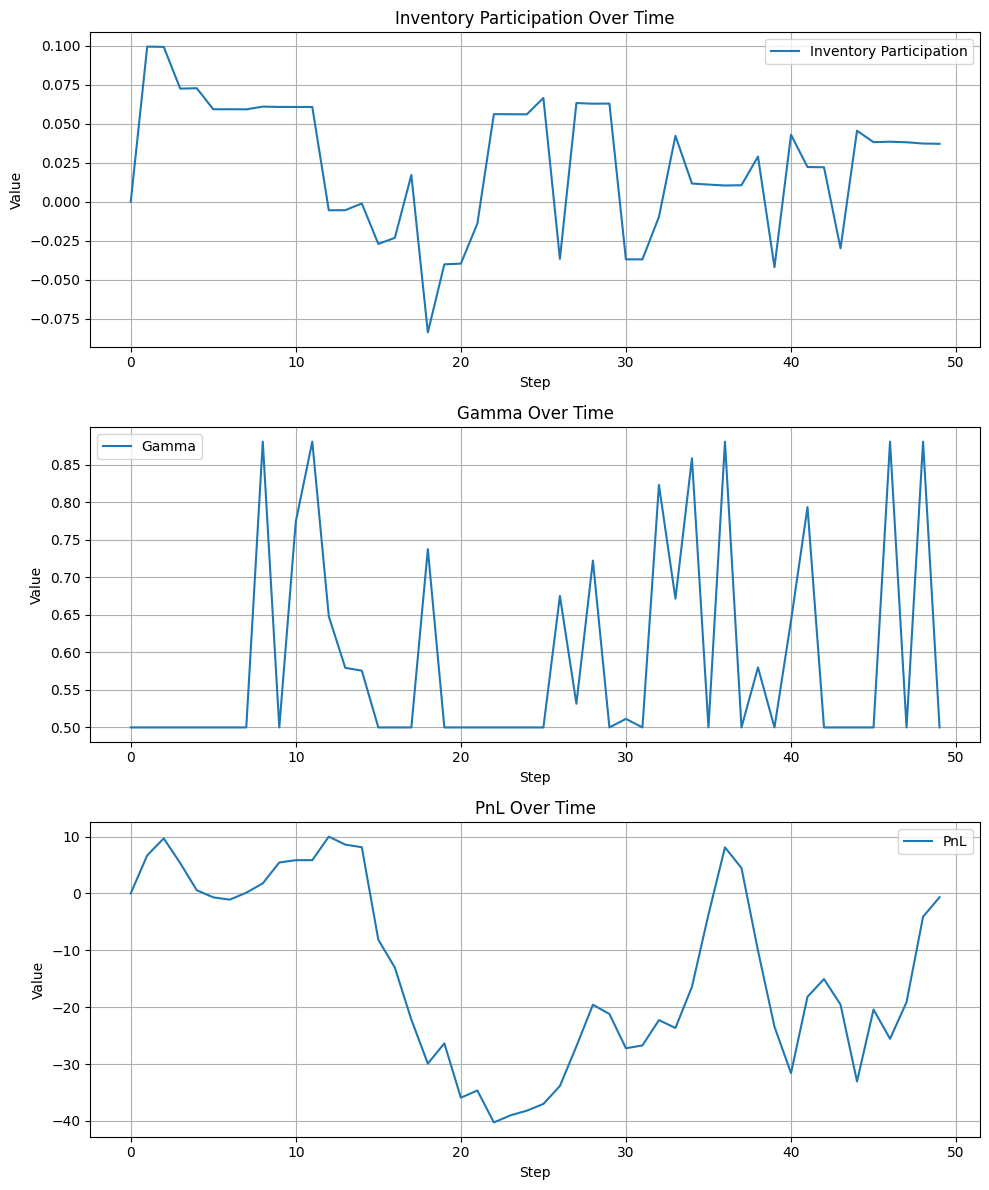

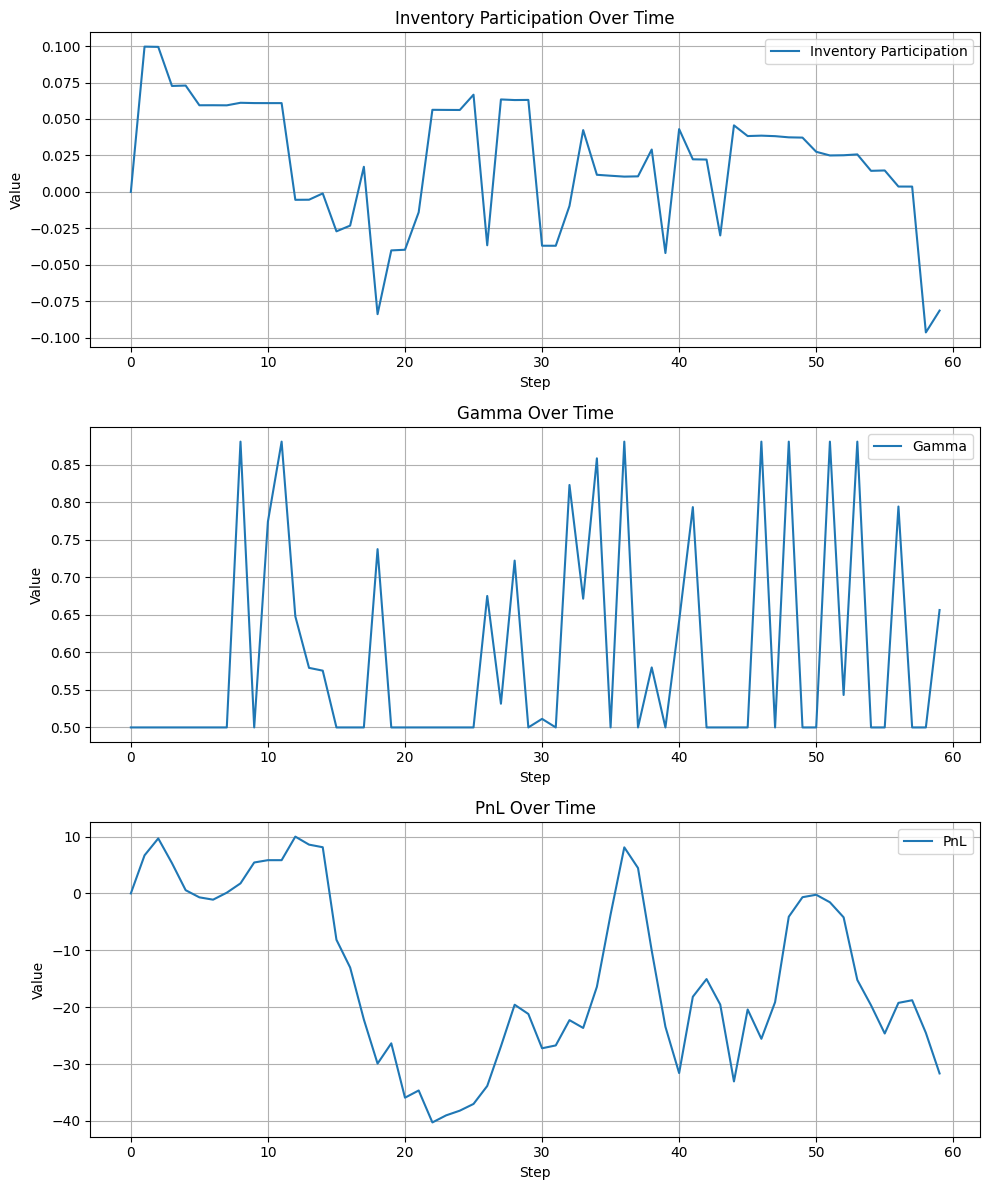

In [10]:
    env = MarketMakingEnv(X_train, window_size=100)
vec_env, obs = env.get_sb_env()
obs = vec_env.reset()

gammas = []
PnLs = []
for i in range(10000):
    clear_output(True)
    if i % 1000 == 0:
        env.make_plots()
    action, _ = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    print(f"Step: {env.current_step}, Gamma: {info[0]['gamma']:.3f}, PnL: {info[0]['pnl']:.2f}")
    gammas.append(info[0]['gamma'])
    PnLs.append(info[0]['pnl'])
    if done:
        break

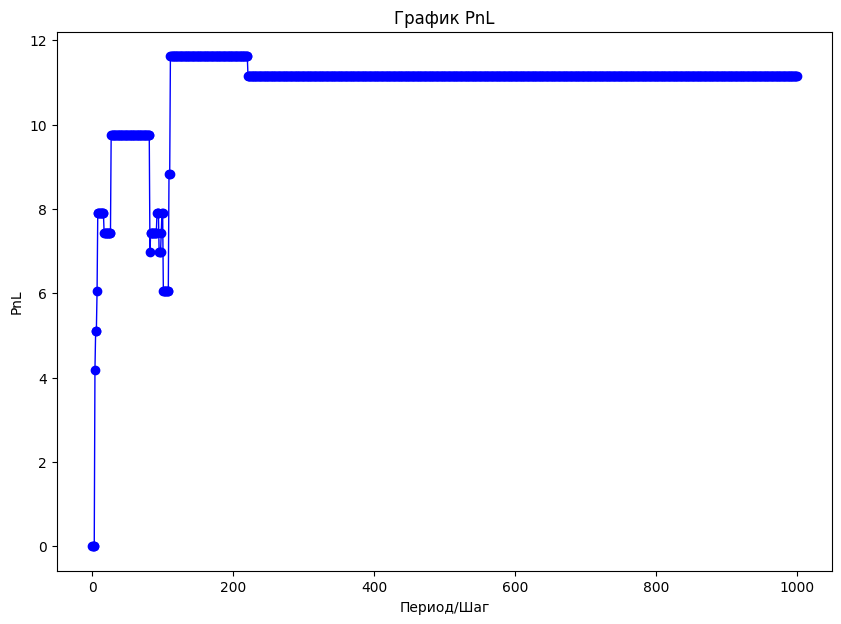

In [99]:
plt.figure(figsize=(10, 7))
plt.plot(PnLs, marker='o', color='b', linewidth=1)
plt.title('График PnL')
plt.xlabel('Период/Шаг')
plt.ylabel('PnL')
plt.show()

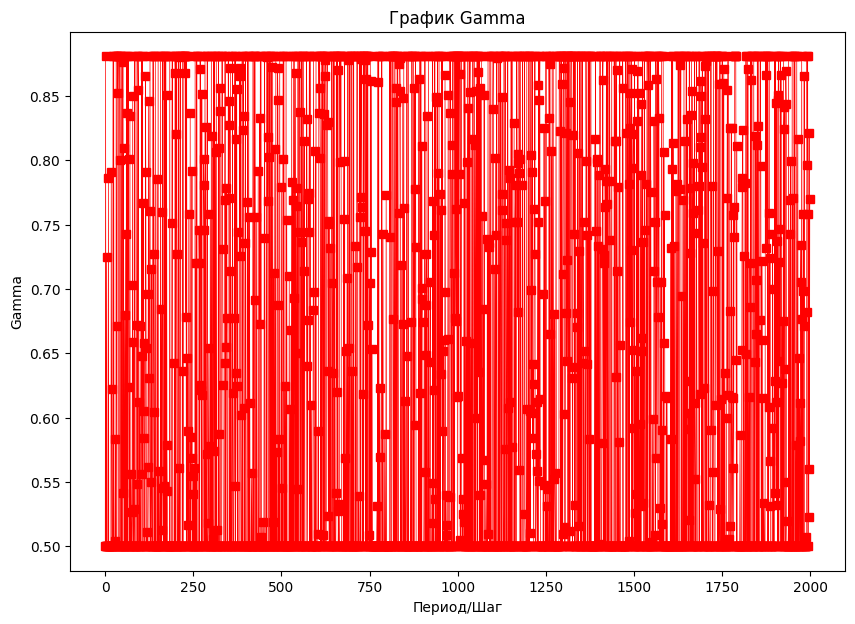

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(gammas, marker='s', color='r', linewidth=0.5)
plt.title('График Gamma')
plt.xlabel('Период/Шаг')
plt.ylabel('Gamma')
plt.show()